Denoising Images

In [9]:
import numpy as np
import skimage.io as sci
from matplotlib import pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.filters import threshold_otsu, threshold_multiotsu
from skimage.color import rgb2gray
import cv2
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank
from skimage.morphology import opening, closing, binary_closing,binary_dilation,binary_opening,binary_erosion ,erosion,dilation
import torch,torchvision
from torchvision import transforms
# Import necessary libraries
import torch
from PIL import Image
import torchvision.transforms as transforms



In [2]:
def gauss(size,size_y = None):
    size = int(size)
    if not size_y:
        size_y = size

    else:
        size_y = int(size_y)

    x, y = numpy.mgrid[-size:size+1,-size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g/g.sum()


gaussian_kernel_array = gauss(1)

print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array)



NameError: name 'numpy' is not defined

Denoising begins

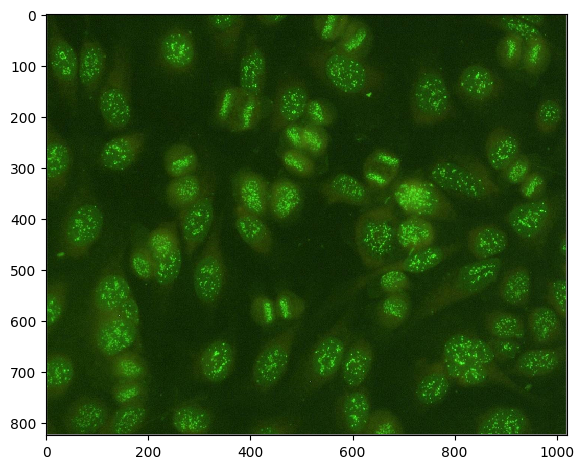

In [10]:
import skimage.io as sci


ana_img = sci.imread(r"C:\Users\Akshit\Downloads\centromere.png")
sci.imshow(ana_img)

In [11]:
if len(ana_img.shape) > 2 and ana_img.shape[2] == 4:
    #convert the image from RGBA2RGB
    img = cv2.cvtColor(ana_img, cv2.COLOR_BGRA2BGR)

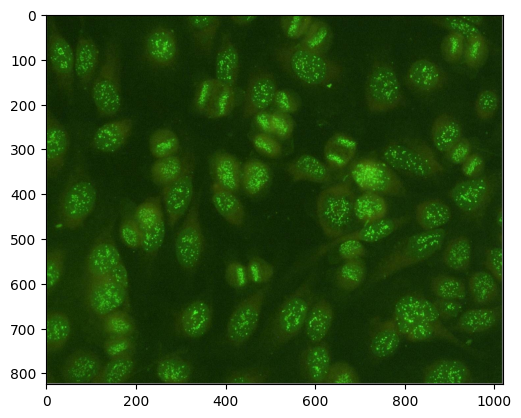

In [12]:
plt.imshow(img)

In [13]:
sigma_est = np.mean(estimate_sigma(ana_img, channel_axis=-1))
print(f'estimated noise standard deviation = {sigma_est}')

patch_kw = dict(
    patch_size=2, patch_distance=3, channel_axis=-1  # 5x5 patches  # 13x13 search area
)

# slow algorithm
denoise = denoise_nl_means(ana_img, h=1.15 * sigma_est, fast_mode=False, **patch_kw)

estimated noise standard deviation = 0.7458451095195218


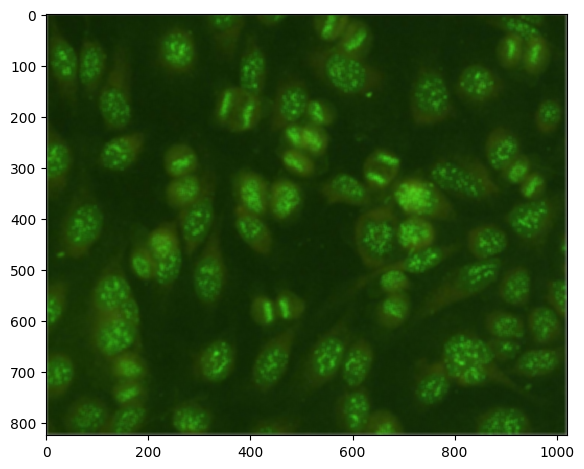

In [14]:
sci.imshow(denoise)

In [ ]:
denoise.shape


(825, 1020, 4)

In [ ]:
ana_img

array([[[128, 128, 128, 143],
        [128, 128, 128, 191],
        [128, 128, 128, 191],
        ...,
        [128, 128, 128, 191],
        [128, 128, 128, 191],
        [128, 128, 128, 167]],

       [[128, 128, 128, 191],
        [128, 128, 128, 255],
        [128, 128, 128, 255],
        ...,
        [128, 128, 128, 255],
        [128, 128, 128, 255],
        [128, 128, 128, 223]],

       [[128, 128, 128, 191],
        [128, 128, 128, 255],
        [ 56,  64,  56, 255],
        ...,
        [ 44,  50,  44, 255],
        [128, 128, 128, 255],
        [128, 128, 128, 223]],

       ...,

       [[128, 128, 128, 191],
        [128, 128, 128, 255],
        [ 51,  72,  32, 255],
        ...,
        [ 34,  58,  16, 255],
        [128, 128, 128, 255],
        [128, 128, 128, 223]],

       [[128, 128, 128, 191],
        [128, 128, 128, 255],
        [128, 128, 128, 255],
        ...,
        [128, 128, 128, 255],
        [128, 128, 128, 255],
        [128, 128, 128, 223]],

       [[128

Histogram Equalisation

In [15]:
grayana = rgb2gray(img)

# Equalization
img_eq_ana = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq_ana = exposure.equalize_adapthist(img, clip_limit=0.03)

d:\Anacondanew1\envs\DeepL\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


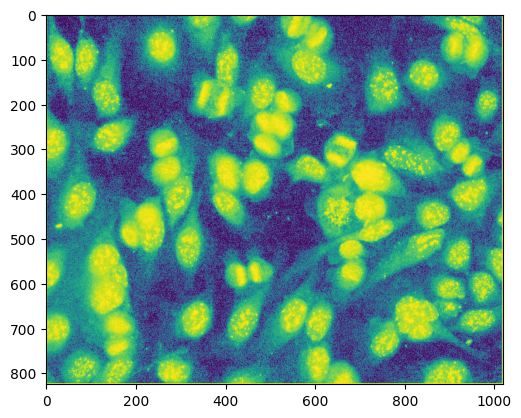

In [ ]:
plt.imshow(img_eq_local_ana)

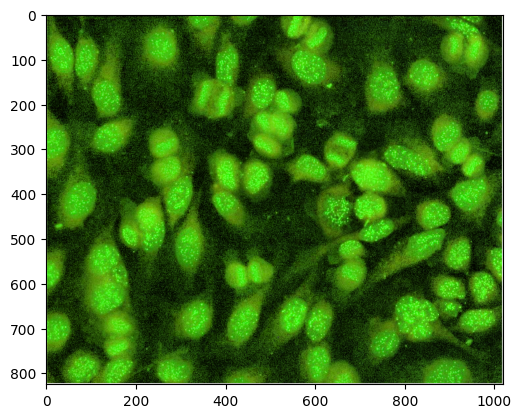

In [16]:
plt.imshow(img_adapteq_ana)

In [10]:
img_adapteq_ana.shape

(825, 1020, 3)

Denoising

In [17]:

sigma_est = np.mean(estimate_sigma(img_adapteq_ana, channel_axis=-1))
print(f'estimated noise standard deviation = {sigma_est}')

patch_kw = dict(
    patch_size=2, patch_distance=3, channel_axis=-1  # 5x5 patches  # 13x13 search area
)

# slow algorithm
denoise = denoise_nl_means(img_adapteq_ana, h=1.15 * sigma_est, fast_mode=False, **patch_kw)

estimated noise standard deviation = 0.011455222435341366


In [ ]:
denoise.shape

(825, 1020, 3)

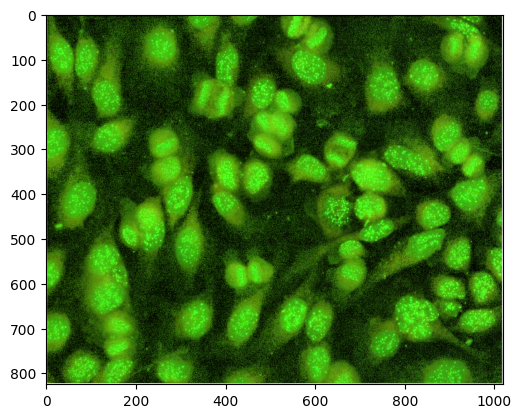

In [18]:
plt.imshow(denoise)

Thresholding

(-0.5, 1019.5, 824.5, -0.5)

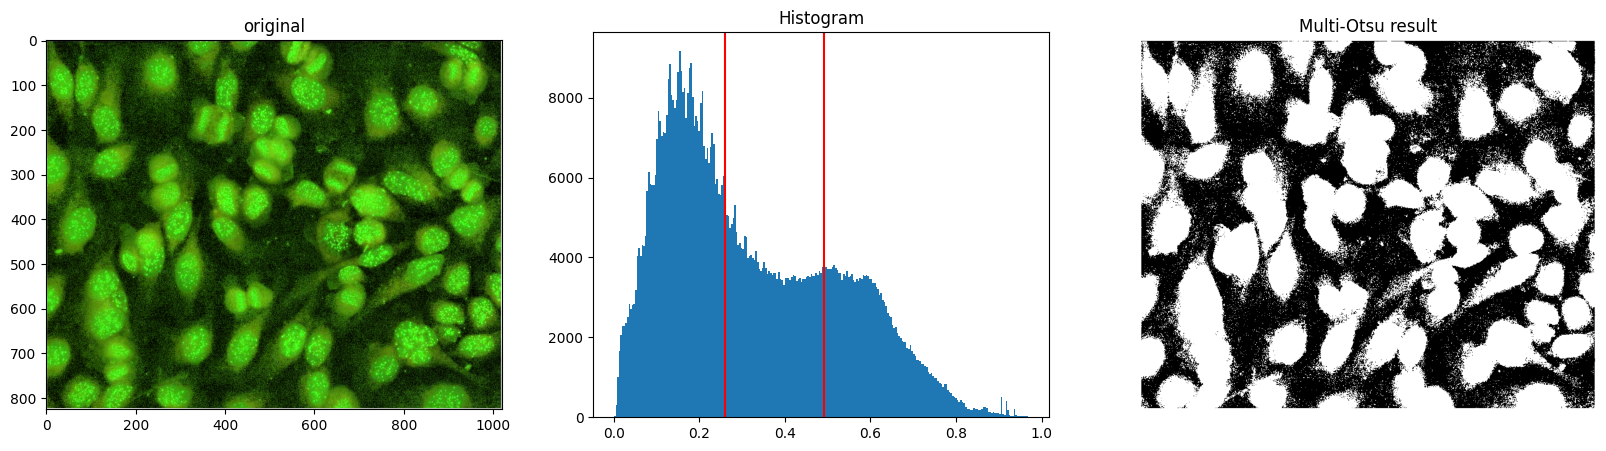

In [19]:
grayana1 = rgb2gray(denoise)

thresholds1 = threshold_multiotsu(grayana1)

# Using the threshold values, we generate the three regions.
regions = np.digitize(grayana1, bins=thresholds1)
binary_ana = regions>thresholds1[1]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ax[0].imshow(denoise)
ax[0].set_title("original")

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(grayana1.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds1:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(binary_ana, cmap='gray')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

d:\Anacondanew1\envs\DeepL\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


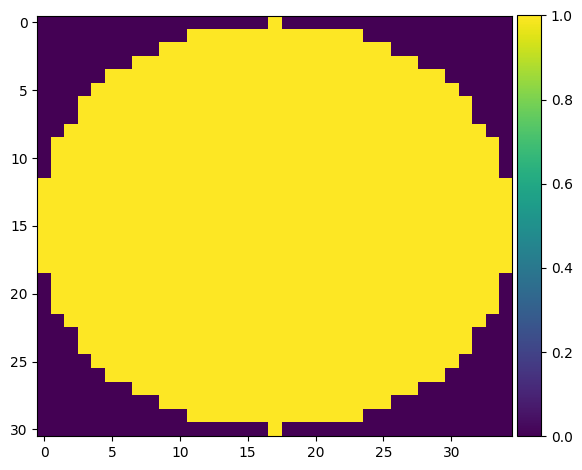

In [20]:

se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(35,31))

sci.imshow(se)

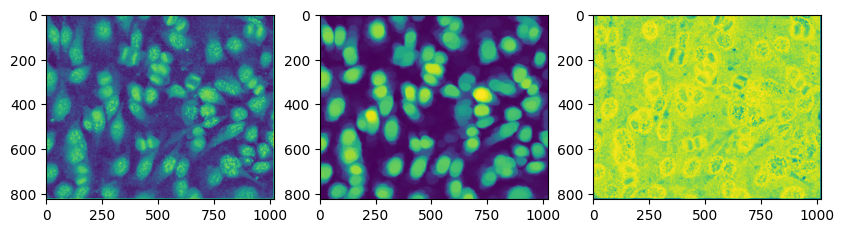

In [25]:
opened = opening(grayana1,se)
wash = opened-grayana1

fig,ax = plt.subplots(1,3,figsize=(10,5))

ax[0].imshow(grayana1)
ax[1].imshow(opened)
ax[2].imshow(wash)



(-0.5, 1019.5, 824.5, -0.5)

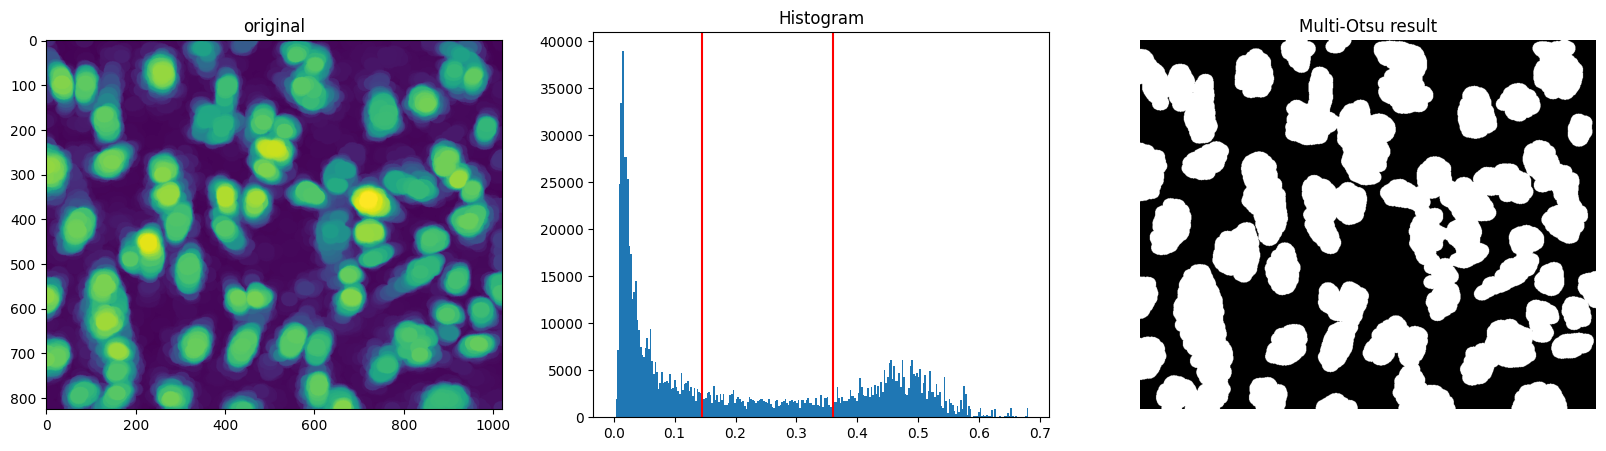

In [34]:
thresholds2 = threshold_multiotsu(opened)

# Using the threshold values, we generate the three regions.
regions2 = np.digitize(opened, bins=thresholds2)
binary_ana2 = regions2>thresholds2[1]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ax[0].imshow(opened)
ax[0].set_title("original")

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(opened.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh2 in thresholds2:
    ax[1].axvline(thresh2, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(binary_ana2, cmap='gray')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

In [40]:
binary_ana_rgb_new_1 = np.repeat(binary_ana2[:, :, np.newaxis], 3, axis=2)
masked_ana1 = denoise*binary_ana_rgb_new_1
open_ana2 = opening(masked_ana1)
closed_ana2 = closing(open_ana2)


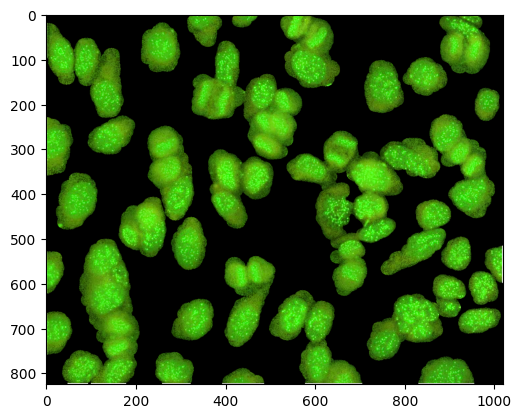

In [38]:
plt.imshow(masked_ana1)

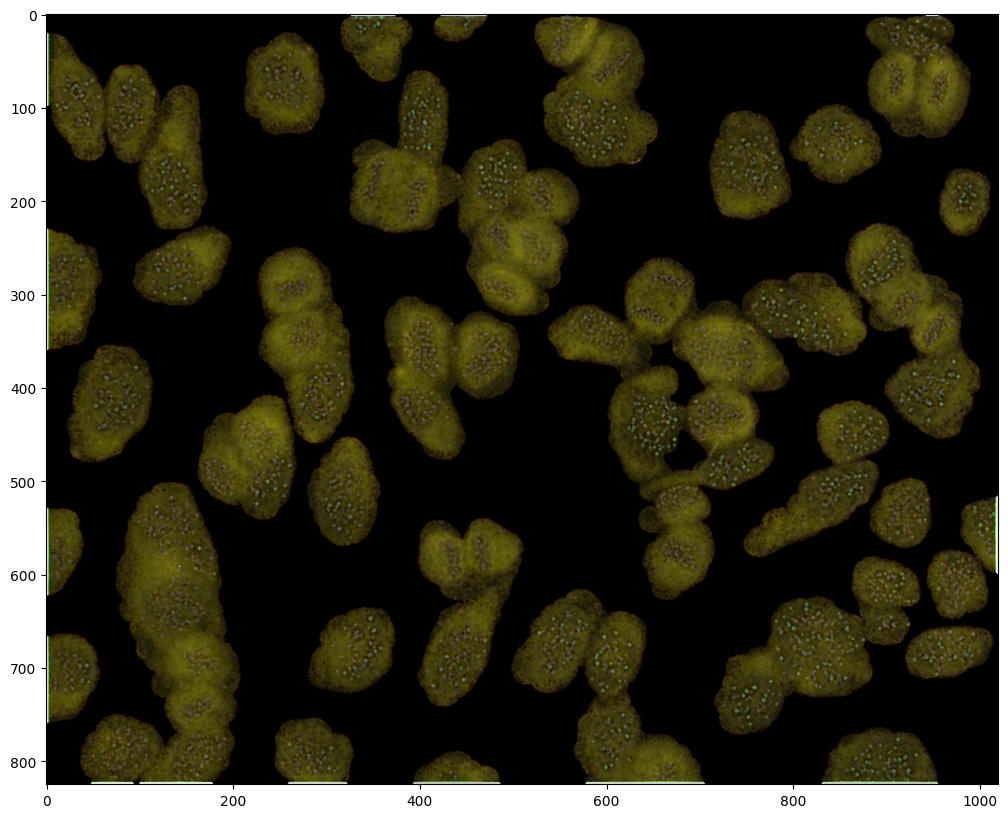

In [45]:
fig,ax = plt.subplots(figsize=(15,10))
ax.imshow(open_ana2)

Text(0.5, 1.0, 'previous')

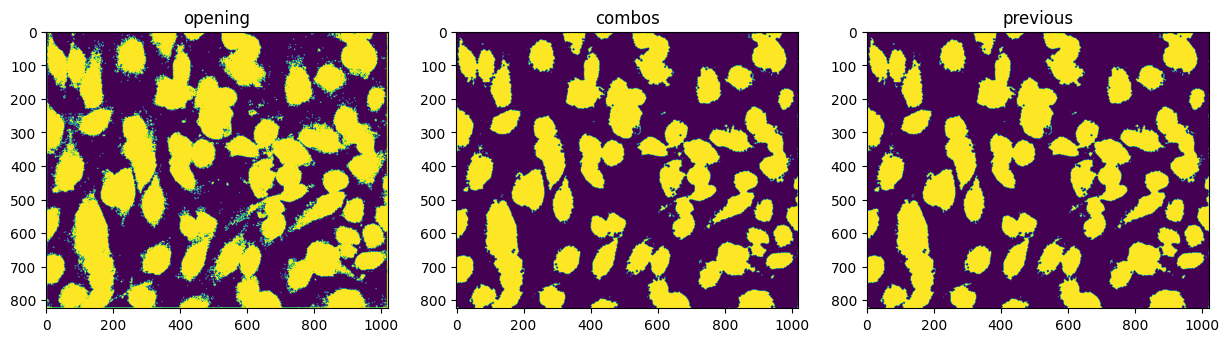

In [49]:


opening_ana = binary_opening(binary_ana)
erod__ana = binary_erosion(opening_ana,footprint=disk(3) )


last_ana = binary_closing(erod__ana)
last_last_ana = binary_closing(last_ana)

fig, ax = plt.subplots(1,3,figsize=(15,10)) 

ax[0].imshow(opening_ana)
ax[0].set_title("opening")
ax[1].imshow(last_last_ana)
ax[1].set_title("combos")
ax[2].imshow(last_ana)
ax[2].set_title("previous")

#the best is opening with erosion, because if we apply dilation, it revereses the effect



In [50]:
binary_ana_rgb_new = np.repeat(last_last_ana[:, :, np.newaxis], 3, axis=2)
masked_ana = denoise*binary_ana_rgb_new


After applying binary morphology

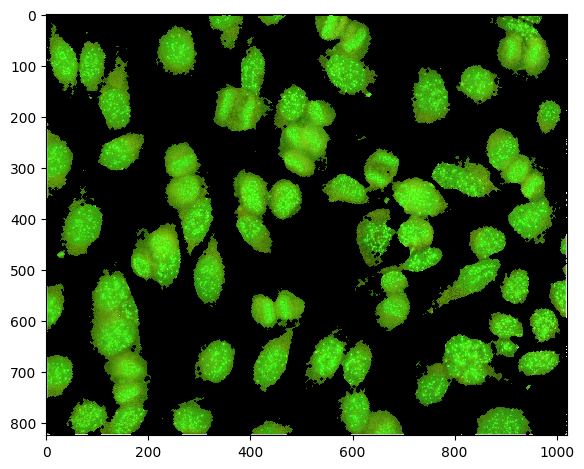

In [51]:
sci.imshow(masked_ana)

after applying grayscale morphology

In [56]:
erosion_ana1 = erosion(masked_ana)
closed_ana1 = opening(erosion_ana1)
open_ana1 = closing(closed_ana1)

Final Results

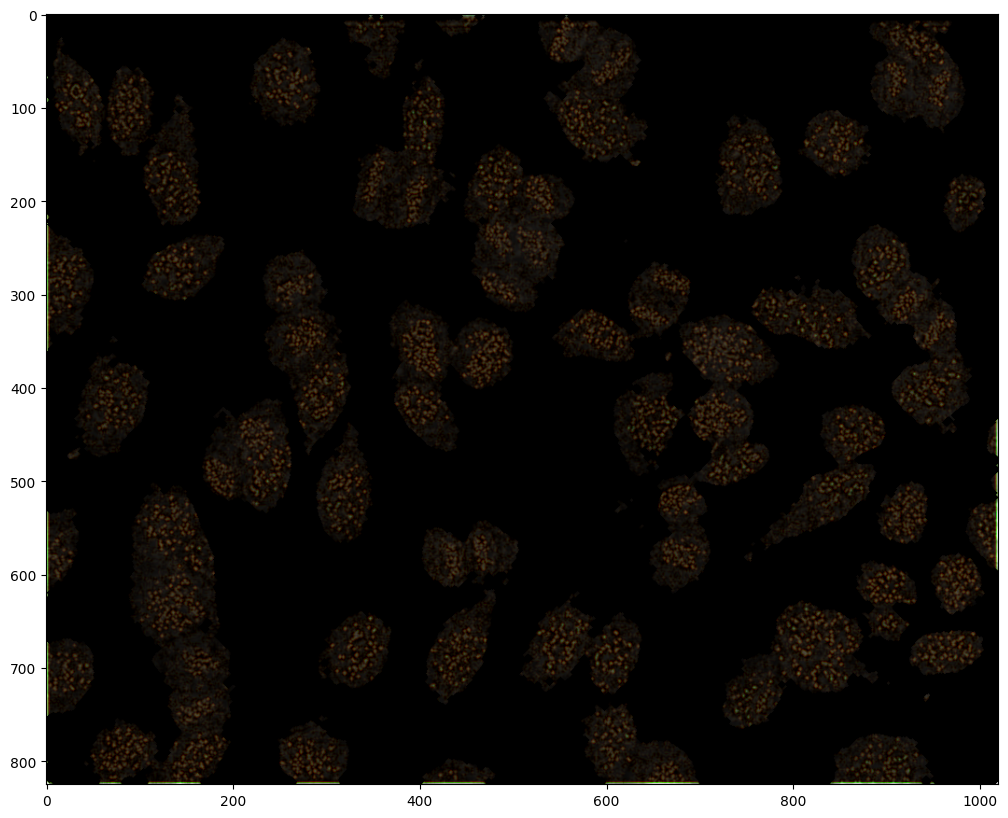

In [57]:
fig, ax = plt.subplots(figsize=(15,10)) 
#centromere 

ax.imshow(open_ana1)

Denoising with Autoencoder

In [6]:
import torch

import torch.nn as nn



class DenoisingAutoencoder(nn.Module):

    def __init__(self, encoding_dim):

        super(DenoisingAutoencoder, self).__init__()

        # Encoder

        self.encoder = nn.Sequential(

            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),

            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),

            nn.ReLU(inplace=True),

            nn.Flatten()

        )

        # Decoder

        self.decoder = nn.Sequential(

            nn.Linear(encoding_dim, 8 * 7 * 7),

            nn.ReLU(inplace=True),

            nn.Unflatten(dim=1, unflattened_size=(8, 7, 7)),

            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),

            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1)

        )



    def forward(self, x):

        encoded = self.encoder(x)

        decoded = self.decoder(encoded)

        return decoded



# Example usage

model = DenoisingAutoencoder(encoding_dim=128) 

img_lena_noisy = Image.open(r"D:\Phelma homework files\Image processing\lena_noisy.png")

transform = transforms.Compose([
    transforms.PILToTensor()
])

# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
img_tensor = transform(img_lena_noisy)


clean_image = model(img_tensor) 


RuntimeError: Input type (unsigned char) and bias type (float) should be the same